<a href="https://colab.research.google.com/github/danipel/Compu-blanda/blob/main/neural_network_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación clasificador no lineal con redes neuronales

## Datos de entrenamiento

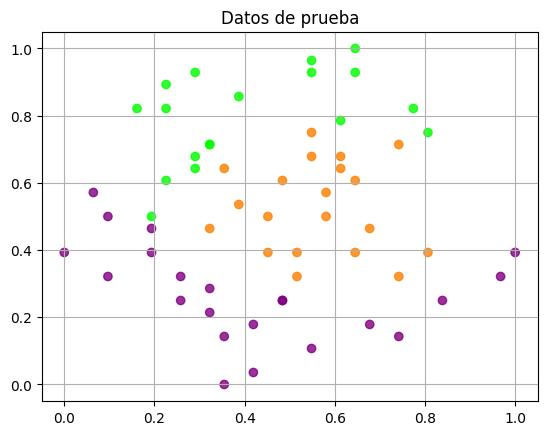

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de entrada
inputs = np.array([(0.0000, 0.3929), (0.5484, 0.7500), (0.0645, 0.5714),
                   (0.5806, 0.5714), (0.2258, 0.8929), (0.4839, 0.2500),
                   (0.3226, 0.2143), (0.7742, 0.8214), (0.4516, 0.5000),
                   (0.4194, 0.0357), (0.4839, 0.2500), (0.3226, 0.7143),
                   (0.5806, 0.5000), (0.5484, 0.1071), (0.6129, 0.6429),
                   (0.6774, 0.1786), (0.2258, 0.8214), (0.7419, 0.1429),
                   (0.6452, 1.0000), (0.8387, 0.2500), (0.9677, 0.3214),
                   (0.3226, 0.4643), (0.3871, 0.5357), (0.3548, 0.1429),
                   (0.3548, 0.6429), (0.1935, 0.4643), (0.4516, 0.3929),
                   (0.4839, 0.6071), (0.6129, 0.6786), (0.2258, 0.6071),
                   (0.5161, 0.3214), (0.5484, 0.6786), (0.3871, 0.8571),
                   (0.6452, 0.6071), (0.1935, 0.3929), (0.6452, 0.3929),
                   (0.6774, 0.4643), (0.3226, 0.2857), (0.7419, 0.7143),
                   (0.7419, 0.3214), (1.0000, 0.3929), (0.8065, 0.3929),
                   (0.1935, 0.5000), (0.1613, 0.8214), (0.2903, 0.9286),
                   (0.3548, 0.0000), (0.2903, 0.6786), (0.5484, 0.9643),
                   (0.4194, 0.1786), (0.2581, 0.2500), (0.3226, 0.7143),
                   (0.5161, 0.3929), (0.2903, 0.6429), (0.5484, 0.9286),
                   (0.2581, 0.3214), (0.0968, 0.5000), (0.6129, 0.7857),
                   (0.0968, 0.3214), (0.6452, 0.9286), (0.8065, 0.7500)])#(60,2)

purple = np.array([0.5, 0, 0.5])  # Morado
orange = np.array([1, 0.5, 0])  # Naranja
green = np.array([0, 1, 0])  # Verde

# Actualizar los targets con los nuevos colores
targets = [purple, orange, purple, orange, green, purple, purple, green, orange,
purple, purple, green, orange, purple, orange, purple, green, purple, green,
purple, purple, orange, orange, purple, orange, purple, orange, orange, orange,
green, orange, orange, green, orange, purple, orange, orange, purple, orange,
orange, purple, orange, green, green, green, purple, green, green, purple,
purple, green, orange, green, green, purple, purple, green, purple, green, green]

# Visualizar los datos de prueba con los colores correctos
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, alpha=0.8)
plt.title("Datos de prueba")
plt.grid()
plt.show()


In [ ]:
# Redefinir para la facilidad de los cálculos.
purple = np.array([1, 0, 0])
orange = np.array([0, 1, 0])
green = np.array([0, 0, 1])
targets = [purple, orange, purple, orange, green, purple, purple, green, orange,
purple, purple, green, orange, purple, orange, purple, green, purple, green,
purple, purple, orange, orange, purple, orange, purple, orange, orange, orange,
green, orange, orange, green, orange, purple, orange, orange, purple, orange,
orange, purple, orange, green, green, green, purple, green, green, purple,
purple, green, orange, green, green, purple, purple, green, purple, green, green]

## Implementación

### Definición de funciones

In [ ]:
# La función
def f(x, ws, bs):
  return x.dot(ws.T) + bs

def softmax(z):
  z = z - np.max(z, axis=1, keepdims=True)  # Restar el máximo valor en cada fila
  exp_z = np.exp(z)
  sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)  # (30,1) para broadcast
  return exp_z / sum_exp_z

# Función del costo para clasificación multiclase (categorical cross-entropy)
def log_loss(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))  # Evitar log(0)

# Función activación [Entrada --> Capa oculta]
def relu(x):
  return np.maximum(0, x)

### Ciclo principal

Epoch:  0  Loss:  1.0986578858217935
Epoch:  100  Loss:  0.7224707234090725
Epoch:  200  Loss:  0.45687284431778663
Epoch:  300  Loss:  0.42413323169282385
Epoch:  400  Loss:  0.4182786751470386
Epoch:  500  Loss:  0.4093647966104646
Epoch:  600  Loss:  0.3994331683851842
Epoch:  700  Loss:  0.37356185044816453
Epoch:  800  Loss:  0.31324794472879647
Epoch:  900  Loss:  0.2789877038719763
Epoch:  1000  Loss:  0.2341440451762604
Epoch:  1100  Loss:  0.2104424579322429
Epoch:  1200  Loss:  0.1503026121916921
Epoch:  1300  Loss:  0.28057716790179915
Epoch:  1400  Loss:  0.135138854310738
Epoch:  1500  Loss:  0.15145255627302626
Epoch:  1600  Loss:  0.17650990840829714
Epoch:  1700  Loss:  0.1258984334244417
Epoch:  1800  Loss:  0.11528424141110884
Epoch:  1900  Loss:  0.10945660795037249
Epoch:  2000  Loss:  0.10292485283585688
Epoch:  2100  Loss:  0.09891668597817262
Epoch:  2200  Loss:  0.09451188994876215
Epoch:  2300  Loss:  0.0905143930096632
Epoch:  2400  Loss:  0.08918548562552334


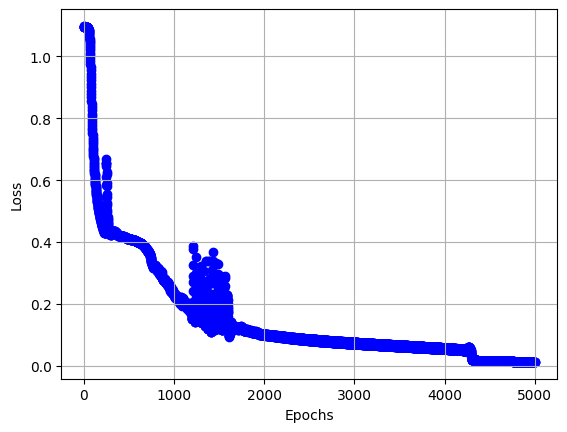

In [ ]:
hidden_neurons = 8  # Número de neuronas en la capa oculta

# Inicialización de los pesos con valores aleatorios pequeños
np.random.seed(42)
ws1 = np.random.randn(hidden_neurons, 2) * 0.01  # Pesos para la capa oculta (hidden_neurons, 2)
bs1 = np.random.randn(hidden_neurons) * 0.01     # Sesgos para la capa oculta (hidden_neurons,)

ws2 = np.random.randn(3, hidden_neurons) * 0.01  # Pesos para la capa de salida (3, hidden_neurons)
bs2 = np.random.randn(3) * 0.01     # Sesgos para la capa de salida (3,)

lr = 0.01  # Tasa de aprendizaje
epochs = 5000

# Control para visualizar post-iteraciones
iters = []
losses = []

# Ciclo principal
for iter in range(epochs):
    # [Entrada --> Capa oculta]
    pred = f(inputs, ws1, bs1)  # pred (60, 4)
    acts_hidden = relu(pred)  # activaciones capa oculta (60, 4)

    # [Capa oculta --> Salida]
    pred_output = f(acts_hidden, ws2, bs2)  # pred (60, 3)
    acts_output = softmax(pred_output)  # activaciones de salida (60, 3)

    # Función de pérdida (cross-entropy)
    loss = log_loss(acts_output, targets)

    if iter % 100 == 0:
        print("Epoch: ", iter, " Loss: ", loss)
    iters.append(iter)
    losses.append(loss)

    # Backpropagation: Error en la capa de salida
    error_output = acts_output - targets  # (60, 3)

    # Gradiente de la capa de salida (softmax -> cross-entropy)
    grad_ws2 = acts_hidden.T.dot(error_output)  # (hidden_neurons, 3)
    grad_bs2 = np.sum(error_output, axis=0)  # (3,)

    # Error en la capa oculta (derivada de ReLU)
    error_hidden = error_output.dot(ws2) * (acts_hidden > 0)  # (60, hidden_neurons)

    # Gradiente de la capa oculta
    grad_ws1 = inputs.T.dot(error_hidden)  # (2, hidden_neurons)
    grad_bs1 = np.sum(error_hidden, axis=0)  # (hidden_neurons,)

    # Actualización de pesos y sesgos
    ws1 -= lr * grad_ws1.T
    bs1 -= lr * grad_bs1
    ws2 -= lr * grad_ws2.T
    bs2 -= lr * grad_bs2

# Visualización del valor del costo a lo largo del tiempo
plt.scatter(iters, losses, c='b')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### Prueba

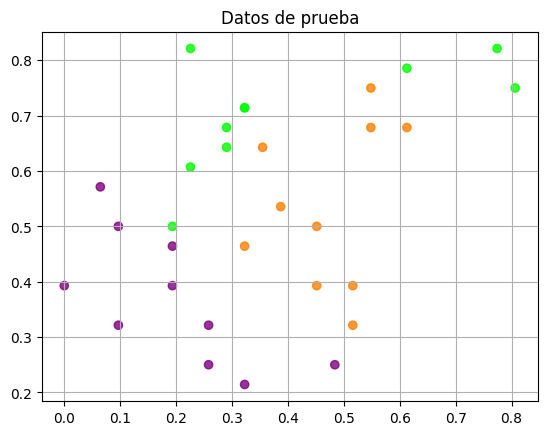

In [ ]:
# Visualizar
# Nuevos colores RGB para matplotlib
purple = np.array([0.5, 0, 0.5])  # Morado
orange = np.array([1, 0.5, 0])  # Naranja
green = np.array([0, 1, 0])  # Verde

test_inputs = np.array([(0.0000, 0.3929), (0.0645, 0.5714), (0.0968, 0.3214),
                        (0.0968, 0.5000), (0.2581, 0.3214), (0.1935, 0.4643),
                        (0.2581, 0.2500), (0.1935, 0.3929), (0.3226, 0.2143),
                        (0.4839, 0.2500), (0.3226, 0.4643), (0.3871, 0.5357),
                        (0.3548, 0.6429), (0.4516, 0.5000), (0.4516, 0.3929),
                        (0.5161, 0.3929), (0.5484, 0.7500), (0.6129, 0.6786),
                        (0.5161, 0.3214), (0.5484, 0.6786), (0.1935, 0.5000),
                        (0.2258, 0.6071), (0.3226, 0.7143), (0.2903, 0.6786),
                        (0.3226, 0.7143), (0.2258, 0.8214), (0.2903, 0.6429),
                        (0.6129, 0.7857), (0.7742, 0.8214), (0.8065, 0.7500)])

test_targets = [purple, purple, purple, purple, purple, purple, purple, purple,
                purple, purple, orange, orange, orange, orange, orange, orange,
                orange, orange, orange, orange, green, green, green, green,
                green, green, green, green, green, green]

# Visualizar los datos de prueba

plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=test_targets, alpha=0.8)
plt.title("Datos de prueba")
plt.grid()
plt.show()

In [ ]:
purple = np.array([1, 0, 0])
orange = np.array([0, 1, 0])
green = np.array([0, 0, 1])

test_targets = [purple, purple, purple, purple, purple, purple, purple, purple,
                purple, purple, orange, orange, orange, orange, orange, orange,
                orange, orange, orange, orange, green, green, green, green,
                green, green, green, green, green, green]

# [Entrada de prueba --> Capa oculta]
hidden_pred = f(test_inputs, ws1, bs1)
hidden_acts = relu(hidden_pred)

# [Capa oculta --> Capa de salida]
output_pred = f(hidden_acts, ws2, bs2)
output_acts = softmax(output_pred)  # Aplicar softmax para obtener probabilidades

# Imprimir las predicciones de la red
print("Predicciones (probabilidades): \n", np.round(output_acts, decimals=2))

# Predicción final - Índice de la clase con mayor probabilidad
predictions = np.argmax(output_acts, axis=1)
print("Índices de predicciones: \n", predictions)

# Convertir targets de prueba a etiquetas numéricas (índices)
true_labels = np.argmax(test_targets, axis=1)
print("Índices de etiquetas reales: \n", true_labels)

# Calcular exactitud
accuracy = np.mean(predictions == true_labels)
print(f"Exactitud (Accuracy): {accuracy * 100:.2f}%")


Predicciones (probabilidades): 
 [[0.99 0.   0.01]
 [0.97 0.   0.02]
 [1.   0.   0.  ]
 [0.99 0.   0.01]
 [1.   0.   0.  ]
 [0.96 0.01 0.03]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.91 0.09]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.93 0.07]
 [0.   1.   0.  ]
 [0.01 0.99 0.  ]
 [0.   1.   0.  ]
 [0.05 0.04 0.91]
 [0.   0.01 0.99]
 [0.   0.   1.  ]
 [0.   0.01 0.99]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.02 0.98]
 [0.   0.08 0.92]
 [0.   0.   1.  ]
 [0.   0.06 0.94]]
Índices de predicciones: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
Índices de etiquetas reales: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
Exactitud (Accuracy): 100.00%


# Implementación red neuronal que reconoce dígitos a partir de imágenes

## Importar los datos de Kaggle

In [ ]:
# Instalar libreria para abrir datasets
!pip install opendatasets
import opendatasets as od

# Asignar link
dataset_link = "https://www.kaggle.com/competitions/digit-recognizer/overview"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danielpelaezchica
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 124MB/s] 


Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [ ]:
# Copiar ruta de donde se cargaron los archivos
import os
os.chdir("digit-recognizer")
os.listdir()

['sample_submission.csv', 'train.csv', 'test.csv']

## Preprocesar los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset (ajusta el nombre del archivo CSV)
data = pd.read_csv('train.csv')

# Ver los primeros registros
print(data.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

A continuación se divide el dataset:
* X = caracteríticas.
* y = etiquetas.

In [ ]:
# Separar las etiquetas y las características
inputs = data.drop('label', axis=1).values  # Eliminar la columna 'label'
targets = data['label'].values

# Normalizar los datos (los datos vienen entre 0 y 255)
inputs = inputs / 255.0

# Dividir en conjunto de entrenamiento y validación (80% entrenamiento, 20% test)
split_ratio = 0.8
split_index = int(split_ratio * inputs.shape[0])  # Índice donde hacer la división

# Conjunto de entrenamiento
inputs_train = inputs[:split_index]
targets_train = targets[:split_index]

# Conjunto de validación
inputs_test = inputs[split_index:]
targets_test = targets[split_index:]

print("Tamaño de inputs de entrenamiento:", inputs_train.shape)
print("Tamaño de targets de entrenamiento:", targets_train.shape)
print("Tamaño de inputs de testing:", inputs_test.shape)
print("Tamaño de targets de testing:", targets_test.shape)


Tamaño de inputs de entrenamiento: (33600, 784)
Tamaño de targets de entrenamiento: (33600,)
Tamaño de inputs de testing: (8400, 784)
Tamaño de targets de testing: (8400,)


## Implementación

### Definición de funciones

In [ ]:
# La función
def f(x, ws, bs):
  return x.dot(ws.T) + bs

def softmax(z):
  z = z - np.max(z, axis=1, keepdims=True)  # Restar el máximo valor en cada fila
  exp_z = np.exp(z)
  sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)  # (30,1) para broadcast
  return exp_z / sum_exp_z

# Función del costo para clasificación multiclase (categorical cross-entropy)
def log_loss(pred, targets):
  return -np.mean(np.sum(targets * np.log(pred + 1e-8), axis=1))  # Evitar log(0)

# Función activación [Entrada --> Capa oculta]
def relu(x):
  return np.maximum(0, x)

# Función para modificar los targets a one-hot
def to_categorical(y, num_classes):
  y = y.astype(int)  # Asegurarse de que las etiquetas sean enteros
  categorical = np.zeros((len(y), num_classes))  # Inicializar matriz de ceros
  for i, label in enumerate(y):
    categorical[i, label] = 1  # Establecer 1 en la posición de la clase correspondiente
  return categorical

### Código principal

Epoch 0, Loss: 2.477160231449467
Predicciones: [8 8 8 6 8]
Epoch 100, Loss: 1.8284216560710658
Predicciones: [8 0 1 6 0]
Epoch 200, Loss: 1.4152454630772195
Predicciones: [8 0 1 6 0]
Epoch 300, Loss: 1.1299679503332551
Predicciones: [8 0 1 6 0]
Epoch 400, Loss: 0.9392962168146545
Predicciones: [1 0 1 6 0]
Epoch 500, Loss: 0.815669557075063
Predicciones: [1 0 1 6 0]
Epoch 600, Loss: 0.7312776201647392
Predicciones: [1 0 1 6 0]
Epoch 700, Loss: 0.670265570012574
Predicciones: [1 0 1 6 0]
Epoch 800, Loss: 0.6239859123015269
Predicciones: [1 0 1 6 0]
Epoch 900, Loss: 0.5875739703588683
Predicciones: [1 0 1 6 0]
Epoch 1000, Loss: 0.5581102463935252
Predicciones: [1 0 1 6 0]
Epoch 1100, Loss: 0.5337154721144944
Predicciones: [1 0 1 6 0]
Epoch 1200, Loss: 0.5131619656081163
Predicciones: [1 0 1 6 0]
Epoch 1300, Loss: 0.4955848097473288
Predicciones: [1 0 1 6 0]
Epoch 1400, Loss: 0.48036494010754177
Predicciones: [1 0 1 6 0]
Epoch 1500, Loss: 0.46705492126380815
Predicciones: [1 0 1 6 0]
Epoch

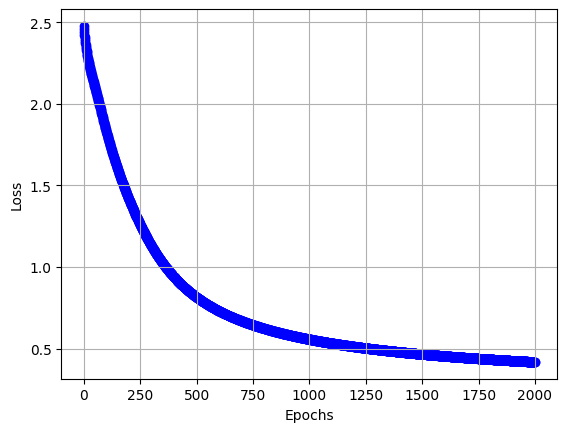

In [ ]:
targets_train = to_categorical(targets_train, 10)  # Convertir a one-hot encoding

m = data.shape[0]
hidden_neurons = 20  # Número de neuronas en la capa oculta

# Inicialización de los pesos entre -0.5 y 0.5
np.random.seed(42)
#ws1 = np.random.uniform(-0.5, 0.5, (hidden_neurons, inputs_train.shape[1]))  # (hidden_neurons, n_entradas)
#ws2 = np.random.uniform(-0.5, 0.5, (10, hidden_neurons))  # (n_neuronas_salida, hidden_neurons)
ws1 = np.random.randn(hidden_neurons, inputs_train.shape[1]) * np.sqrt(2. / inputs_train.shape[1])
ws2 = np.random.randn(10, hidden_neurons) * np.sqrt(2. / hidden_neurons)


# Inicialización de los sesgos a 0
#bs1 = np.zeros(hidden_neurons)  # Tamaño de la capa oculta
#bs2 = np.zeros(10)   # Tamaño de la capa de salida (10 clases: dígitos 0-9)
bs1 = np.random.randn(hidden_neurons) * np.sqrt(2. / inputs_train.shape[1])  # Sesgos capa oculta
bs2 = np.random.randn(10) * np.sqrt(2. / hidden_neurons)  # Sesgos capa de salida

lr = 0.01  # Tasa de aprendizaje
epochs = 2000

# Control para visualizar post-iteraciones
iters = []
losses = []

# Ciclo principal
for iter in range(epochs):
  # [Entrada --> Capa oculta]
  pred = f(inputs_train, ws1, bs1)  # pred (n_samples, hidden_neurons)
  acts_hidden = relu(pred)  # activaciones capa oculta (n_samples, hidden_neurons)

  # [Capa oculta --> Salida]
  pred_output = f(acts_hidden, ws2, bs2)  # pred (n_samples, 10)
  acts_output = softmax(pred_output)  # activaciones de salida (n_samples, 10)

  # Función de pérdida (cross-entropy)
  loss = log_loss(acts_output, targets_train)


  if iter % 100 == 0:  # Imprimir cada 10 épocas
    print(f"Epoch {iter}, Loss: {loss}")
    print(f"Predicciones: {np.argmax(acts_output[:5], axis=1)}")  # Mostrar las primeras 5 predicciones

  iters.append(iter)
  losses.append(loss)

  # Backpropagation: Error en la capa de salida
  error_output = acts_output - targets_train  # (n_samples, 10)

  # Gradiente de la capa de salida (softmax -> cross-entropy)
  grad_ws2 = (1 / m) * acts_hidden.T.dot(error_output)  # (hidden_neurons, 10)
  grad_bs2 = (1 / m) * np.sum(error_output, axis=0)  # (10,)

  # Error en la capa oculta (derivada de ReLU)
  error_hidden = error_output.dot(ws2) * (acts_hidden > 0)  # (n_samples, hidden_neurons)

  # Gradiente de la capa oculta
  grad_ws1 = (1 / m) * inputs_train.T.dot(error_hidden)  # (n_entradas, hidden_neurons)
  grad_bs1 = (1 / m) * np.sum(error_hidden, axis=0)  # (hidden_neurons,)

  # Actualización de pesos y sesgos
  ws1 -= lr * grad_ws1.T
  bs1 -= lr * grad_bs1
  ws2 -= lr * grad_ws2.T
  bs2 -= lr * grad_bs2

# Visualización del valor del costo a lo largo del tiempo
plt.scatter(iters, losses, c='b')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
# [FASE DE PRUEBA]
pred = f(inputs_test, ws1, bs1)  # Paso por la capa oculta
acts_hidden_test = relu(pred)  # Activaciones de la capa oculta
pred_output_test = f(acts_hidden_test, ws2, bs2)  # Salida
acts_output_test = softmax(pred_output_test)  # Activaciones de salida (softmax)

# Obtener la clase con mayor probabilidad
predicted_classes = np.argmax(acts_output_test, axis=1)

# Calcular precisión general
accuracy = np.mean(predicted_classes == targets_test)  # Comparar con las verdaderas etiquetas
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

# 1. Calcular precisión por clase
num_classes = 10
for i in range(num_classes):
    # Filtrar ejemplos donde la verdadera clase es "i"
    correct_predictions = np.sum((predicted_classes == i) & (targets_test == i))
    total_examples = np.sum(targets_test == i)
    accuracy_per_class = correct_predictions / total_examples if total_examples > 0 else 0
    print(f'Precisión para la clase {i}: {accuracy_per_class * 100:.2f}%')

# 2. Mostrar ejemplos de predicciones incorrectas
print("\nAlgunos ejemplos de predicciones incorrectas:")
incorrect_predictions = np.where(predicted_classes != targets_test)[0]
for i in incorrect_predictions[:5]:  # Mostrar los primeros 5 ejemplos incorrectos
    print(f"Ejemplo {i}: Verdadero = {targets_test[i]}, Predicho = {predicted_classes[i]}")

Precisión en el conjunto de prueba: 88.52%
Precisión para la clase 0: 95.07%
Precisión para la clase 1: 97.26%
Precisión para la clase 2: 84.39%
Precisión para la clase 3: 86.28%
Precisión para la clase 4: 88.53%
Precisión para la clase 5: 76.17%
Precisión para la clase 6: 94.83%
Precisión para la clase 7: 90.16%
Precisión para la clase 8: 84.54%
Precisión para la clase 9: 85.12%

Algunos ejemplos de predicciones incorrectas:
Ejemplo 8: Verdadero = 8, Predicho = 5
Ejemplo 10: Verdadero = 3, Predicho = 2
Ejemplo 31: Verdadero = 8, Predicho = 1
Ejemplo 39: Verdadero = 8, Predicho = 1
Ejemplo 55: Verdadero = 3, Predicho = 9


Epoch 0, Loss: 2.4634299441433334
Predicciones: [4 4 0 2 4]
Epoch 100, Loss: 1.771311107703163
Predicciones: [8 0 1 2 0]
Epoch 200, Loss: 1.3045114337151955
Predicciones: [1 0 1 2 0]
Epoch 300, Loss: 1.0205363230178397
Predicciones: [1 0 1 6 0]
Epoch 400, Loss: 0.8487235183305257
Predicciones: [1 0 1 6 0]
Epoch 500, Loss: 0.738297015854872
Predicciones: [1 0 1 6 0]
Epoch 600, Loss: 0.662518177600415
Predicciones: [1 0 1 6 0]
Epoch 700, Loss: 0.6076408614866803
Predicciones: [1 0 1 6 0]
Epoch 800, Loss: 0.5661090971163392
Predicciones: [1 0 1 6 0]
Epoch 900, Loss: 0.5335352182917705
Predicciones: [1 0 1 6 0]
Epoch 1000, Loss: 0.5072680171473273
Predicciones: [1 0 1 6 0]
Epoch 1100, Loss: 0.48560470949114654
Predicciones: [1 0 1 6 0]
Epoch 1200, Loss: 0.4674104994900629
Predicciones: [1 0 1 6 0]
Epoch 1300, Loss: 0.4518839732186301
Predicciones: [1 0 1 6 0]
Epoch 1400, Loss: 0.4384518155520447
Predicciones: [1 0 1 6 0]
Epoch 1500, Loss: 0.4266959801549134
Predicciones: [1 0 1 6 0]
Epoch 

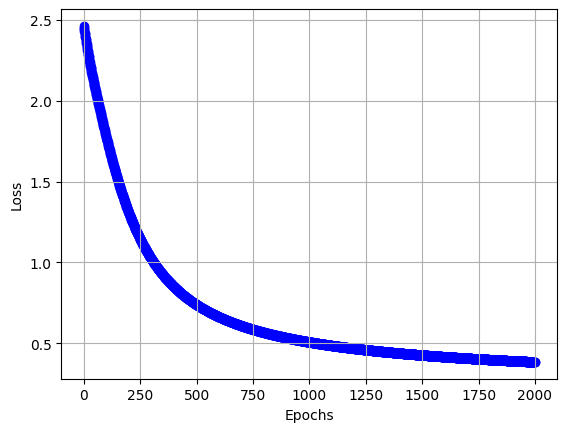

In [ ]:
targets_train = to_categorical(targets_train, 10)  # Convertir a one-hot encoding

m = data.shape[0]
hidden_neurons = 80  # Número de neuronas en la capa oculta

# Inicialización de los pesos entre -0.5 y 0.5
np.random.seed(42)
#ws1 = np.random.uniform(-0.5, 0.5, (hidden_neurons, inputs_train.shape[1]))  # (hidden_neurons, n_entradas)
#ws2 = np.random.uniform(-0.5, 0.5, (10, hidden_neurons))  # (n_neuronas_salida, hidden_neurons)
ws1 = np.random.randn(hidden_neurons, inputs_train.shape[1]) * np.sqrt(2. / inputs_train.shape[1])
ws2 = np.random.randn(10, hidden_neurons) * np.sqrt(2. / hidden_neurons)


# Inicialización de los sesgos a 0
#bs1 = np.zeros(hidden_neurons)  # Tamaño de la capa oculta
#bs2 = np.zeros(10)   # Tamaño de la capa de salida (10 clases: dígitos 0-9)
bs1 = np.random.randn(hidden_neurons) * np.sqrt(2. / inputs_train.shape[1])  # Sesgos capa oculta
bs2 = np.random.randn(10) * np.sqrt(2. / hidden_neurons)  # Sesgos capa de salida

lr = 0.01  # Tasa de aprendizaje
epochs = 2000

# Control para visualizar post-iteraciones
iters = []
losses = []

# Ciclo principal
for iter in range(epochs):
  # [Entrada --> Capa oculta]
  pred = f(inputs_train, ws1, bs1)  # pred (n_samples, hidden_neurons)
  acts_hidden = relu(pred)  # activaciones capa oculta (n_samples, hidden_neurons)

  # [Capa oculta --> Salida]
  pred_output = f(acts_hidden, ws2, bs2)  # pred (n_samples, 10)
  acts_output = softmax(pred_output)  # activaciones de salida (n_samples, 10)

  # Función de pérdida (cross-entropy)
  loss = log_loss(acts_output, targets_train)


  if iter % 100 == 0:  # Imprimir cada 10 épocas
    print(f"Epoch {iter}, Loss: {loss}")
    print(f"Predicciones: {np.argmax(acts_output[:5], axis=1)}")  # Mostrar las primeras 5 predicciones

  iters.append(iter)
  losses.append(loss)

  # Backpropagation: Error en la capa de salida
  error_output = acts_output - targets_train  # (n_samples, 10)

  # Gradiente de la capa de salida (softmax -> cross-entropy)
  grad_ws2 = (1 / m) * acts_hidden.T.dot(error_output)  # (hidden_neurons, 10)
  grad_bs2 = (1 / m) * np.sum(error_output, axis=0)  # (10,)

  # Error en la capa oculta (derivada de ReLU)
  error_hidden = error_output.dot(ws2) * (acts_hidden > 0)  # (n_samples, hidden_neurons)

  # Gradiente de la capa oculta
  grad_ws1 = (1 / m) * inputs_train.T.dot(error_hidden)  # (n_entradas, hidden_neurons)
  grad_bs1 = (1 / m) * np.sum(error_hidden, axis=0)  # (hidden_neurons,)

  # Actualización de pesos y sesgos
  ws1 -= lr * grad_ws1.T
  bs1 -= lr * grad_bs1
  ws2 -= lr * grad_ws2.T
  bs2 -= lr * grad_bs2

# Visualización del valor del costo a lo largo del tiempo
plt.scatter(iters, losses, c='b')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### Test

In [ ]:
# [FASE DE PRUEBA]
pred = f(inputs_test, ws1, bs1)  # Paso por la capa oculta
acts_hidden_test = relu(pred)  # Activaciones de la capa oculta
pred_output_test = f(acts_hidden_test, ws2, bs2)  # Salida
acts_output_test = softmax(pred_output_test)  # Activaciones de salida (softmax)

# Obtener la clase con mayor probabilidad
predicted_classes = np.argmax(acts_output_test, axis=1)

# Calcular precisión general
accuracy = np.mean(predicted_classes == targets_test)  # Comparar con las verdaderas etiquetas
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

# 1. Calcular precisión por clase
num_classes = 10
for i in range(num_classes):
    # Filtrar ejemplos donde la verdadera clase es "i"
    correct_predictions = np.sum((predicted_classes == i) & (targets_test == i))
    total_examples = np.sum(targets_test == i)
    accuracy_per_class = correct_predictions / total_examples if total_examples > 0 else 0
    print(f'Precisión para la clase {i}: {accuracy_per_class * 100:.2f}%')

# 2. Mostrar ejemplos de predicciones incorrectas
print("\nAlgunos ejemplos de predicciones incorrectas:")
incorrect_predictions = np.where(predicted_classes != targets_test)[0]
for i in incorrect_predictions[:5]:  # Mostrar los primeros 5 ejemplos incorrectos
    print(f"Ejemplo {i}: Verdadero = {targets_test[i]}, Predicho = {predicted_classes[i]}")

Precisión en el conjunto de prueba: 89.75%
Precisión para la clase 0: 95.66%
Precisión para la clase 1: 97.05%
Precisión para la clase 2: 86.77%
Precisión para la clase 3: 87.30%
Precisión para la clase 4: 89.52%
Precisión para la clase 5: 81.79%
Precisión para la clase 6: 94.71%
Precisión para la clase 7: 91.74%
Precisión para la clase 8: 85.04%
Precisión para la clase 9: 85.71%

Algunos ejemplos de predicciones incorrectas:
Ejemplo 8: Verdadero = 8, Predicho = 5
Ejemplo 10: Verdadero = 3, Predicho = 2
Ejemplo 55: Verdadero = 3, Predicho = 9
Ejemplo 74: Verdadero = 5, Predicho = 3
Ejemplo 81: Verdadero = 8, Predicho = 5
